<a href="https://colab.research.google.com/github/Kajal1905/superstore-sales-analysis/blob/main/Superstore_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Sp1: Load the CSV into Pandas
df = pd.read_csv("train.csv")
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (9800, 18)
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region   

In [4]:
#Sp2: Connect to sqlite (create the sales.db if it does not exits)
conn = sqlite3.connect("sales.db")

#Sp3: Save the data frame into sqlite
df.to_sql("sales", conn, if_exists = "replace", index=False)
print("Data successfully improted into SQLite!")

#sp4: run sql query directly from python
query = "SELECT * FROM sales LIMIT 5;"
result = pd.read_sql_query(query, conn)
print(result)



Data successfully improted into SQLite!
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal 

In [5]:
#example: sales by region (if column exists)

query = """ SELECT Region, SUM(Sales) AS TotalSales
FROM sales
GROUP BY Region
ORDER BY TotalSales DESC;"""

sales_region = pd.read_sql_query(query, conn)
print(sales_region)

conn.close()

    Region   TotalSales
0     West  710219.6845
1     East  669518.7260
2  Central  492646.9132
3    South  389151.4590


In [6]:
#sales by region
sales_by_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
print("\nSales by Region:\n",sales_by_region)


Sales by Region:
 Region
West       710219.6845
East       669518.7260
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64


In [7]:
#Sales by Category & Subcategory
sales_by_cat = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().sort_values(ascending = False)
print("\nSales by Category & Sub-Category:\n",sales_by_cat)


Sales by Category & Sub-Category:
 Category         Sub-Category
Technology       Phones          327782.4480
Furniture        Chairs          322822.7310
Office Supplies  Storage         219343.3920
Furniture        Tables          202810.6280
Office Supplies  Binders         200028.7850
Technology       Machines        189238.6310
                 Accessories     164186.7000
                 Copiers         146248.0940
Furniture        Bookcases       113813.1987
Office Supplies  Appliances      104618.4030
Furniture        Furnishings      89212.0180
Office Supplies  Paper            76828.3040
                 Supplies         46420.3080
                 Art              26705.4100
                 Envelopes        16128.0460
                 Labels           12347.7260
                 Fasteners         3001.9600
Name: Sales, dtype: float64


In [8]:
#sales by segment
sales_by_segment = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
print("\nSales by Segment:\n", sales_by_segment)


Sales by Segment:
 Segment
Consumer       1.148061e+06
Corporate      6.884941e+05
Home Office    4.249822e+05
Name: Sales, dtype: float64


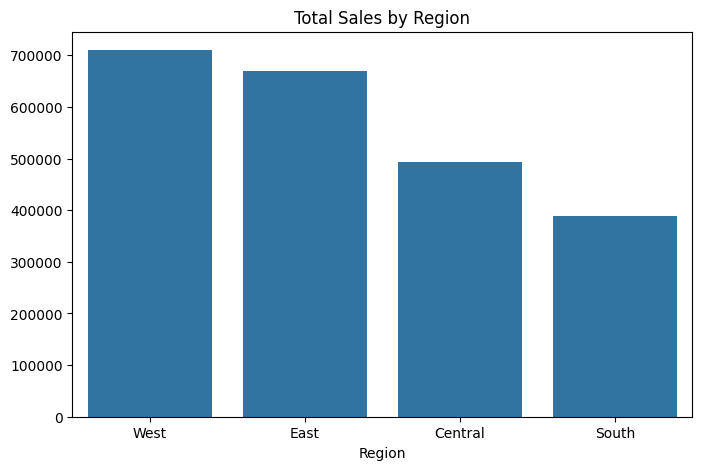

In [9]:
#Visualisation

plt.figure(figsize=(8,5))
sns.barplot(x=sales_by_region.index, y=sales_by_region.values)
plt.title("Total Sales by Region")
plt.show()

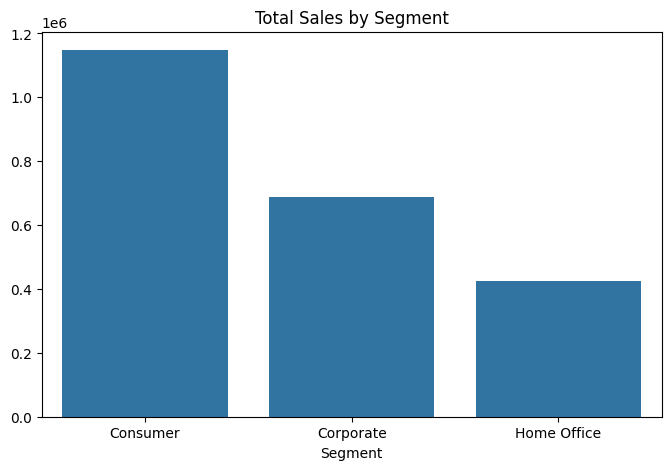

In [10]:
plt.figure(figsize=(8,5))
sns.barplot(x=sales_by_segment.index, y=sales_by_segment.values)
plt.title("Total Sales by Segment")
plt.show()

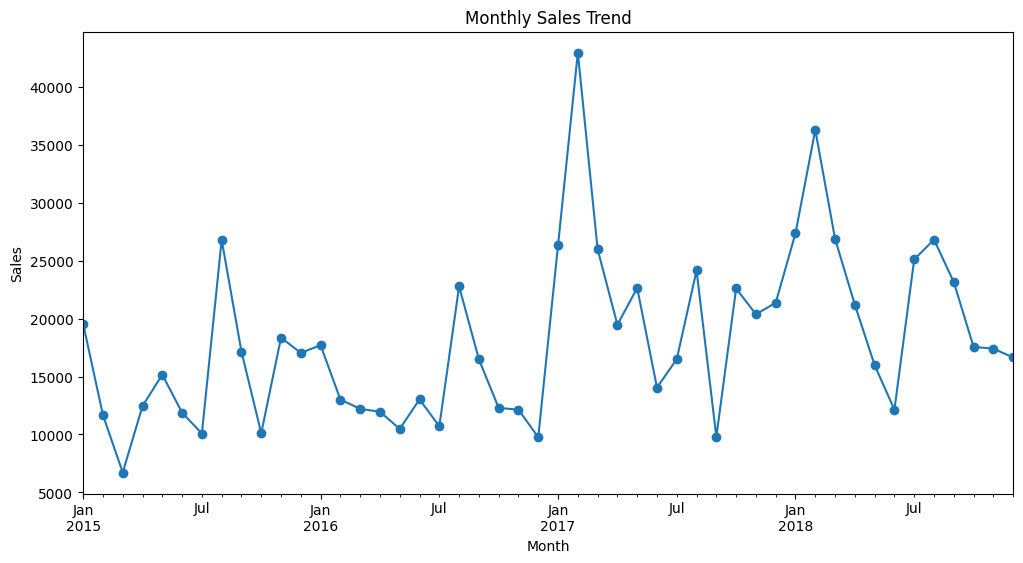

In [11]:
#Time Series Analysis

#Convert order data to datetime first
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

#monthly sales
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()


In [12]:
#top customers & Products

top_cust = df.groupby("Customer Name")['Sales'].sum().sort_values(ascending=False).head(10)
top_prod = df.groupby("Product Name")['Sales'].sum().sort_values(ascending=False).head(10)

print("\nTop Customers: \n", top_cust)
print("\nTop Products:\n", top_prod)


Top Customers: 
 Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Sales, dtype: float64

Top Products:
 Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                     

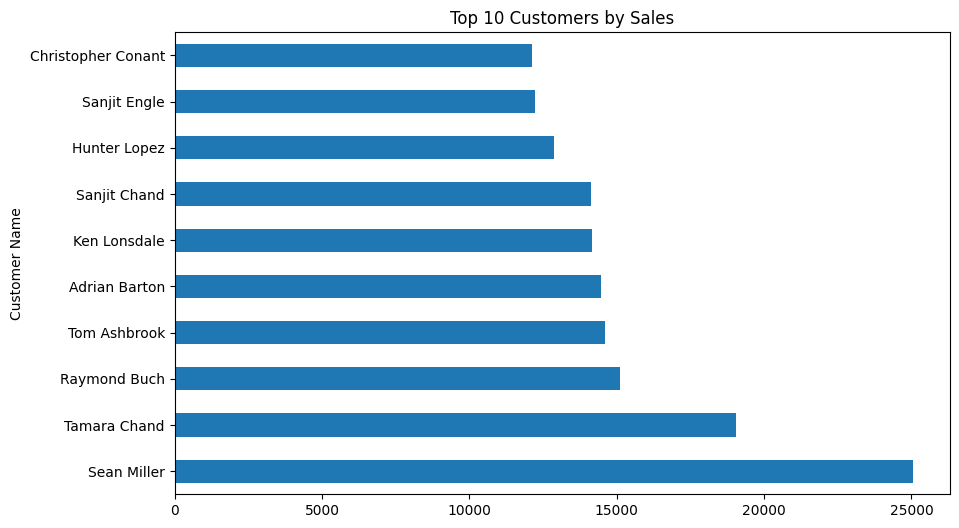

In [13]:
#Visualisation

plt.figure(figsize=(10,6))
top_cust.plot(kind='barh')
plt.title("Top 10 Customers by Sales")
plt.show()

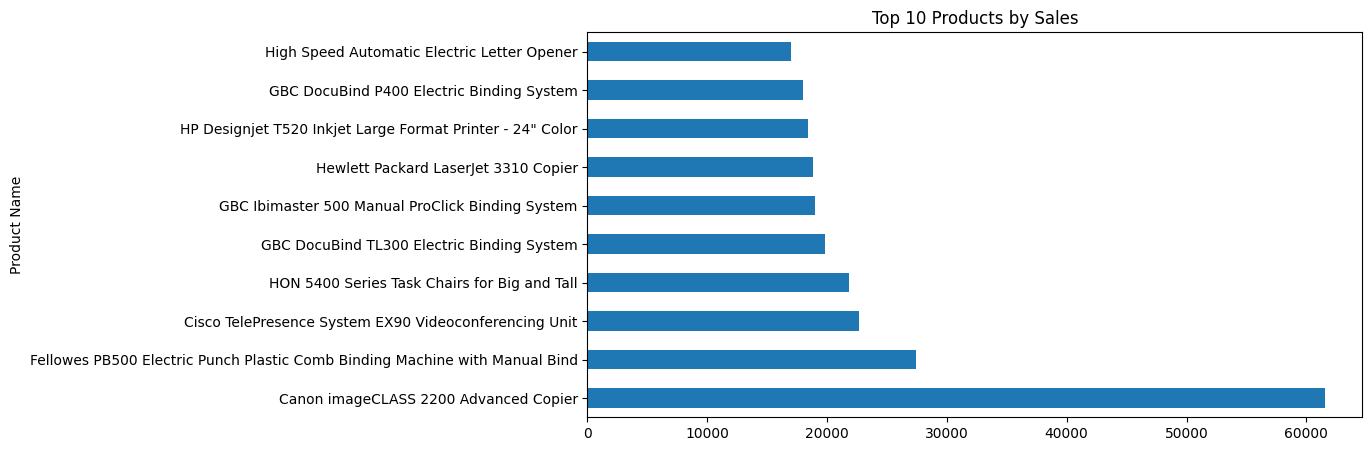

In [14]:
plt.figure(figsize=(10,5))
top_prod.plot(kind='barh')
plt.title("Top 10 Products by Sales")
plt.show()

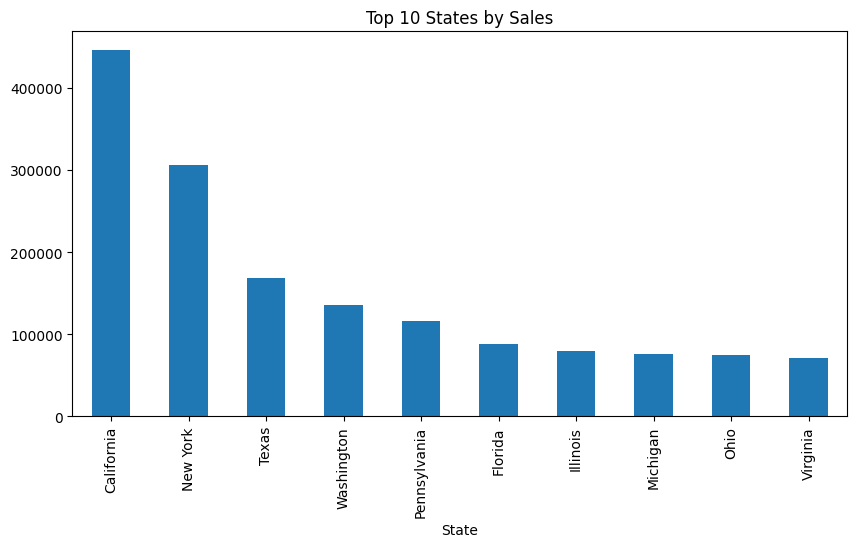

In [15]:
#deep dive insights
#sales by states
sales_by_state = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sales_by_state.plot(kind='bar')
plt.title("Top 10 States by Sales")
plt.show()


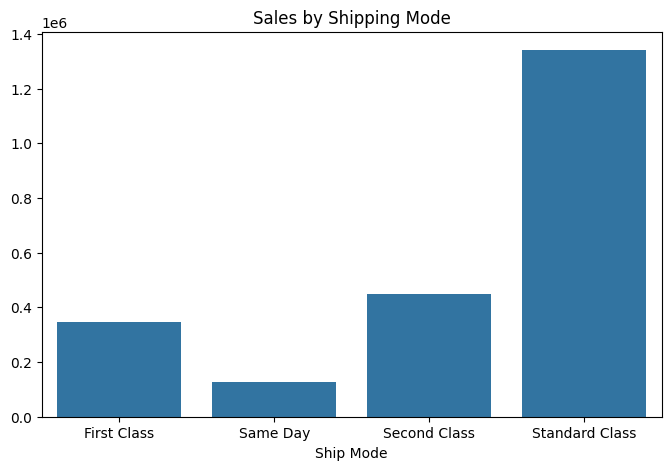

In [16]:
#Sales by ship mode
ship_mode_sales = df.groupby('Ship Mode')['Sales'].sum()

plt.figure(figsize=(8,5))
sns.barplot(x=ship_mode_sales.index, y=ship_mode_sales.values)
plt.title("Sales by Shipping Mode")
plt.show()

In [17]:
# -----------------------
#Final Presentation / Summary
# -----------------------

print("📌 Final Key Insights:")
print("- Best Region:", sales_by_region.idxmax(), "with Sales =", sales_by_region.max())
print("- Best Segment:", sales_by_segment.idxmax(), "with Sales =", sales_by_segment.max())
print("- Top Cust:", top_cust.idxmax(), "with Sales =", top_cust.max())
print("- Top Prod:", top_prod.idxmax(), "with Sales =", top_prod.max())
print("- State with Highest Sales:", sales_by_state.idxmax(), "with Sales =", sales_by_state.max())

print("\n✅ Project Completed: Data cleaned, analyzed, and visualised!")

📌 Final Key Insights:
- Best Region: West with Sales = 710219.6845
- Best Segment: Consumer with Sales = 1148060.531
- Top Cust: Sean Miller with Sales = 25043.05
- Top Prod: Canon imageCLASS 2200 Advanced Copier with Sales = 61599.824
- State with Highest Sales: California with Sales = 446306.4635

✅ Project Completed: Data cleaned, analyzed, and visualised!
